In [1]:
# import pandas package
# https://pandas.pydata.org/docs/user_guide/dsintro.html
import pandas as pd

In [9]:
# two major kinds of data types
# series: record
# data frame: collection of records

# series data type
# similar to one dimensional ndarray
# defining series data type
# syntax: s = pd.Series(data, index=index)
# can be created from a dictionary, list, ndarray, scalar
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(d, index=['a', 'b', 'c'])
ser

a    1
b    2
c    3
dtype: int64

In [10]:
l = [1, 2, 3]
s = pd.Series(l, index=['a', 'b', 'c'])
s

a    1
b    2
c    3
dtype: int64

In [16]:
# how to access the series
# using iloc
print(ser.iloc[0])
print(ser.iloc[: 2])
print(ser.iloc[[0, 2, 1]]) # using index numbers
print(ser.dtype)
print('b' in ser) # similar to dict

1
a    1
b    2
dtype: int64
a    1
c    3
b    2
dtype: int64
int64
True


In [15]:
ser.loc['a'] # using indexe names

np.int64(1)

In [17]:
# updating series
ser.loc['a'] = 4
ser

a    4
b    2
c    3
dtype: int64

In [18]:
ser.iloc[1] = 5
ser

a    4
b    5
c    3
dtype: int64

In [21]:
ser.values # returns the ndarray

array([4, 5, 3])

In [22]:
ser.T

a    4
b    5
c    3
dtype: int64

In [23]:
ser + ser

a     8
b    10
c     6
dtype: int64

In [24]:
ser.index

Index(['a', 'b', 'c'], dtype='object')

In [37]:
# data frames are similar to 2-D ndarrays
# are collection of series
# structured records
# index of a data frame is the union of the indexes of the various Series.
# https://pandas.pydata.org/docs/user_guide/dsintro.html#dataframe
d = {
   "one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]),
   "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]),
    }
d

{'one': a    1.0
 b    2.0
 c    3.0
 dtype: float64,
 'two': a    1.0
 b    2.0
 c    3.0
 d    4.0
 dtype: float64}

In [27]:
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [31]:
df["one"] # can be accessed through the column names

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [30]:
df["two"]

a    1.0
b    2.0
c    3.0
d    4.0
Name: two, dtype: float64

In [32]:
# indexes can be altered
pd.DataFrame(d, index=["d", "b", "a"])

,one,two
d,NaN,4.0
b,2.0,2.0
a,1.0,1.0


In [33]:
# non existent columns will fill the columns with NaN
pd.DataFrame(d, index=["d", "b", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
b,2.0,NaN
a,1.0,NaN


In [35]:
# from dict
d = {"one": [1.0, 2.0, 3.0, 4.0], "two": [4.0, 3.0, 2.0, 1.0]}
df = pd.DataFrame(d)
df # default indexes are numbered starting from 0

,one,two
0,1.0,4.0
1,2.0,3.0
2,3.0,2.0
3,4.0,1.0


In [36]:
pd.DataFrame(d, index=["a", "b", "c", "d"]) # indexes can be added

,one,two
a,1.0,4.0
b,2.0,3.0
c,3.0,2.0
d,4.0,1.0


In [40]:
# Initialize with data type
import numpy as np
data = np.zeros((2,), dtype=[("A", "i4"), ("B", "f4"), ("C", "S10")])
data

array([(0, 0., b''), (0, 0., b'')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [41]:
data[:] = [(1, 2.0, "Hello"), (2, 3.0, "World")]
data

array([(1, 2., b'Hello'), (2, 3., b'World')],
      dtype=[('A', '<i4'), ('B', '<f4'), ('C', 'S10')])

In [43]:
df = pd.DataFrame(data)
df

,A,B,C
0,1,2.0,b'Hello'
1,2,3.0,b'World'


In [44]:
pd.DataFrame(data, index=["first", "second"])

,A,B,C
first,1,2.0,b'Hello'
second,2,3.0,b'World'


In [45]:
# from a list of dicts
data2 = [{"a": 1, "b": 2}, {"a": 5, "b": 10, "c": 20}]
df2 = pd.DataFrame(data2)
df2

,a,b,c
0,1,2,NaN
1,5,10,20.0


In [54]:
# from named tuples
from collections import namedtuple
Point = namedtuple("Point", "x y")
points = pd.DataFrame([Point(0, 0), Point(0, 3), (2, 3)])
points

,x,y
0,0,0
1,0,3
2,2,3


In [47]:
# accessing the data frame elements
# access columns
df2["a"]

0    1
1    5
Name: a, dtype: int64

In [59]:
# iloc
df2.iloc[0]

a    1.0
b    2.0
c    NaN
Name: 0, dtype: float64

In [58]:
# loc
df2.loc[0]

a    1.0
b    2.0
c    NaN
Name: 0, dtype: float64

In [55]:
# creating new columns
dfa = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})
dfa.assign(C=lambda x: x["A"] + x["B"], D=lambda x: x["A"] + x["C"])

,A,B,C,D
0,1,4,5,6
1,2,5,7,9
2,3,6,9,12


In [60]:
#Multi- index and Index Hierarchy
os = ['G1','G1','G1','G2','G2','G2']
ins = [1,2,3,1,2,3]
hi_in = list(zip(os,ins))
hi_in = pd.MultiIndex.from_tuples(hi_in)
hi_in

MultiIndex([('G1', 1),
            ('G1', 2),
            ('G1', 3),
            ('G2', 1),
            ('G2', 2),
            ('G2', 3)],
           )

In [61]:
df = pd.DataFrame(np.random.randn(6,2),index=hi_in, columns=['A','B'])
df

A         B
G1 1  1.791541  1.549345
   2 -0.584099 -1.089419
   3 -1.260473 -0.200388
G2 1  0.623106 -1.274227
   2  1.552997 -0.589333
   3  0.704119  0.038778

In [67]:
df.loc['G1']['A'] # index and column

1    1.791541
2   -0.584099
3   -1.260473
Name: A, dtype: float64

In [68]:
df.iloc[0]

A    1.791541
B    1.549345
Name: (G1, 1), dtype: float64

In [69]:
# merging two data frames
#joining
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                     'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                               'key2': ['K0', 'K0', 'K0', 'K0'],
                                  'C': ['C0', 'C1', 'C2', 'C3'],
                                  'D': ['D0', 'D1', 'D2', 'D3']})

pd.merge(left,right, on=['key1', 'key2'])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [70]:
# working with data file

# Load the dataset into a DataFrame
# diabetes.csv dataset can be downloaded from https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/diabetes.csv
import pandas as pd
df = pd.read_csv('diabetes.csv')
# Display the first few rows of the DataFrame
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [72]:
# Display information about the dataset (e.g., data types, non-null counts)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [73]:
# Summary statistics for numerical columns
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [74]:
# Checking for missing values
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [94]:
#Data Preprocessing
# Remove duplicates (if any)
df = df.drop_duplicates()
# Select specific columns (e.g., only 'Product' and 'Revenue')
df_selected = df[['BMI', 'Age']]
print(df_selected)

      BMI  Age
0    33.6   50
1    26.6   31
2    23.3   32
3    28.1   21
4    43.1   33
..    ...  ...
763  32.9   63
764  36.8   27
765  26.2   30
766  30.1   47
767  30.4   23

[768 rows x 2 columns]


In [86]:
df_selected.groupby("Age").mean()

,BMI
Age,
21,27.817460
22,29.509722
23,31.502632
24,32.569565
25,31.943750
26,34.915152
27,31.950000
28,33.642857
29,33.541379


In [96]:
# df_selected.groupby(by="Age").count()
df_selected.groupby("Age").count()

,BMI
Age,
21,63
22,72
23,38
24,46
25,48
26,33
27,32
28,35
29,29


In [93]:
# Filter rows where 'Age' is greater than 30
df_filtered_1 = df[df['Age'] > 30]
print(df_filtered_1)


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
4              0      137             40             35      168  43.1   
8              2      197             70             45      543  30.5   
..           ...      ...            ...            ...      ...   ...   
759            6      190             92              0        0  35.5   
761            9      170             74             31        0  44.0   
762            9       89             62              0        0  22.5   
763           10      101             76             48      180  32.9   
766            1      126             60              0        0  30.1   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

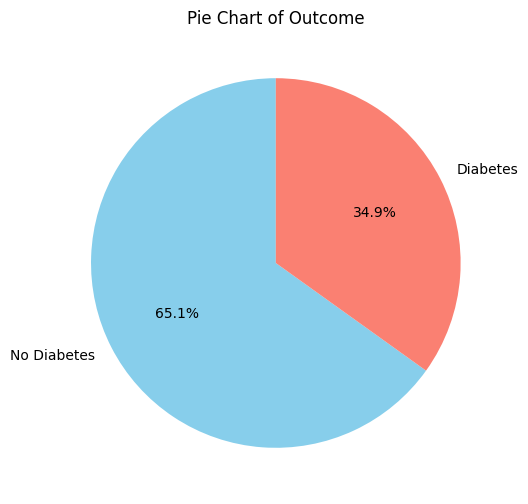

In [78]:
#Analysis of data with visualization
import matplotlib.pyplot as plt
outcome_counts = df['Outcome'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Pie Chart of Outcome')
plt.show()

In [97]:
# renaming
df = pd.DataFrame({"A": [1, 2, 3], "B": [4, 5, 6]})

df.rename(columns={"A": "a", "B": "c"})
df

,A,B
0,1,4
1,2,5
2,3,6
